<a href="https://colab.research.google.com/github/acgiaretta/colab-aulas-python-alura/blob/main/Imers%C3%A3o_de_Dados_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aula 1 - Explorando Dados com Pandas**

In [ ]:
import pandas as pd
# Importando uma biblioteca e atribuindo um nome para ela no meu código

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")
# Novo bloco de código para importação da base de dados (df: data frame)

In [ ]:
df.head()
# Visualização do data frame (df) leitura das primeiras linhas do df, é possível
# indicar quantas linhas desejamos ver dentro do parênteses

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [ ]:
df.info()
# Mostra algumas informações das colunas do df, como nome, tipo de variável, etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [ ]:
df.describe()
# Mostra medidas estatísticas descritivas das variáveis, como média, quartis,
# desvio padrão, amplitude e nº de oservações

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [ ]:
df.shape
# (nº linhas, nº colunas)
# o valor abaixo é tratado como um vetor, assim como no R, em que o primeiro
# valor é o numero de linhas e o segundo o número de colunas

(133349, 11)

In [ ]:
linhas, colunas = df.shape[0], df.shape[1]
# Cria duas variáveis de acordo com o vetor do df.shape (133349, 11), ou seja,
# linhas = 1º valor do vetor df.shape
# colunas = 2º valor do vetor df.shape
print("Linhas:", linhas)
print("Colunas:", colunas)

Linhas: 133349
Colunas: 11


In [ ]:
df.columns
# Mostra os nomes das colunas

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
renomear_colunas = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}
# Define uma nova variável que possui um conjunto de nome definidos e depois é
# utilizada na função .rename para substituir os nomes indicados pelos nomes
# definidos

df.rename(columns=renomear_colunas, inplace=True)
df.columns


Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')

In [ ]:
df["senioridade"].value_counts()
# Comando para contar as frequências de cada categoria de uma coluna do dataframe

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [ ]:
senioridade = {
    'SE': 'Sênior',
    'MI': 'Pleno',
    'EN': 'Júnior',
    'EX': 'Executivo'
}

df["senioridade"] = df["senioridade"].replace(senioridade)
df["senioridade"].value_counts()

,count
senioridade,
Sênior,77241
Pleno,40465
Júnior,12443
Executivo,3200


In [ ]:
df["contrato"].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [ ]:
contrato = {
    'FT': 'Tempo integral',
    'CT': 'Contrato',
    'PT': 'Tempo parcial',
    'FL': 'Freelance'
}

df["contrato"] = df["contrato"].replace(contrato)
df["contrato"].value_counts()

,count
contrato,
Tempo integral,132563
Contrato,394
Tempo parcial,376
Freelance,16


In [ ]:
df["remoto"].value_counts()

,count
remoto,
0,105312
100,27718
50,319


In [ ]:
remoto = {
    0: 'Trabalhos presenciais',
    100: 'Remoto',
    50: 'Híbrido'
}

df['remoto'] = df['remoto'].replace(remoto)
df['remoto'].value_counts()

,count
remoto,
Trabalhos presenciais,105312
Remoto,27718
Híbrido,319


In [ ]:
df["tamanho_empresa"].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


In [ ]:
tamanho_empresa = {
    'M': 'Médio',
    'L': 'Grande',
    'S': 'Pequeno'
}

df['tamanho_empresa'] = df['tamanho_empresa'].replace(tamanho_empresa)
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
Médio,129561
Grande,3574
Pequeno,214


In [ ]:
df["cargo"].value_counts()

,count
cargo,
Data Scientist,17314
Software Engineer,15007
Data Engineer,14868
Data Analyst,12381
Engineer,9456
...,...
Quantitative Research Analyst,1
Data Science Tech Lead,1
Staff Machine Learning Engineer,1


In [ ]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Sênior,Tempo integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo integral,Data Engineer,158800,USD,158800,AU,Trabalhos presenciais,AU,Médio
3,2025.0,Pleno,Tempo integral,Data Engineer,139200,USD,139200,AU,Trabalhos presenciais,AU,Médio
4,2025.0,Júnior,Tempo integral,Data Engineer,90000,USD,90000,US,Trabalhos presenciais,US,Médio


In [ ]:
df.describe(include='object')

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Sênior,Tempo integral,Data Scientist,USD,US,Trabalhos presenciais,US,Médio
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [ ]:
df.describe()

,ano,salario,usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


# **Aula 2 - Aprendendo a Limpar e Preparar os Dados**

In [ ]:
df.isnull()
# código pra verificar se há infos nulas ou ausentes

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Sênior,Tempo integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo integral,Data Engineer,158800,USD,158800,AU,Trabalhos presenciais,AU,Médio
3,2025.0,Pleno,Tempo integral,Data Engineer,139200,USD,139200,AU,Trabalhos presenciais,AU,Médio
4,2025.0,Júnior,Tempo integral,Data Engineer,90000,USD,90000,US,Trabalhos presenciais,US,Médio


In [ ]:
df.isnull().sum()
# mostra todas as variáveis e soma tudo oq é nulo nela

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [ ]:
df['ano'].unique()
# mostra quais os valores únicos nessa coluna em específico
# nan é como mostra nulo

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [ ]:
df[df.isnull().any(axis=1)]
# nos mostra a base, porém com um filtro pra indicar os valores nulos
# criamos um filtro dentro da base com tudo que é nulo, porém só quero exibir essa dimensão

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Sênior,Tempo integral,Product Manager,184500,USD,184500,US,Trabalhos presenciais,US,Médio
59692,NaN,Pleno,Tempo integral,Engineer,110000,USD,110000,DE,Trabalhos presenciais,DE,Médio
59710,NaN,Júnior,Tempo integral,Data Scientist,208800,USD,208800,US,Trabalhos presenciais,US,Médio
59759,NaN,Sênior,Tempo integral,Software Engineer,135000,USD,135000,US,Trabalhos presenciais,US,Médio
59789,NaN,Sênior,Tempo integral,Engineer,112000,USD,112000,US,Trabalhos presenciais,US,Médio
131000,NaN,Sênior,Tempo integral,Machine Learning Engineer,163800,USD,163800,US,Trabalhos presenciais,US,Médio
131006,NaN,Sênior,Tempo integral,Data Analytics Manager,204500,USD,204500,US,Trabalhos presenciais,US,Médio
133054,NaN,Júnior,Tempo integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [ ]:
df_limpo = df.dropna()

In [ ]:
df_limpo.isnull().sum()
# dados limpos pra tirar os nulos

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [ ]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Sênior,Tempo integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo integral,Data Engineer,158800,USD,158800,AU,Trabalhos presenciais,AU,Médio
3,2025.0,Pleno,Tempo integral,Data Engineer,139200,USD,139200,AU,Trabalhos presenciais,AU,Médio
4,2025.0,Júnior,Tempo integral,Data Engineer,90000,USD,90000,US,Trabalhos presenciais,US,Médio


In [ ]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [ ]:
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))
# assign - vai reconfigurar toda a coluna ano
# astype - novo tipo

# **Exemplos Fictícios - Aula 2**

Exemplo de preenchimento com média e mediana

In [ ]:
import numpy as np # importar uma biblioteca p/ manipulação de dados númericos

# criando outro dataframe de teste
df_salarios = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Daniele', 'Val'],
    'salario': [4000, np.nan, 5000, np.nan, 100000]
})

# calcula média salarial, substitui os nulos pela média e arredonda os valores
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))

# calcula mediana e substitui os nulos pela mediana
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

df_salarios

# fillna - vai preencher os nulos
# mean - é a média
# round 2 - arrendondar com 2 casas decimais

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


Exemplo de preenchimento com o valor anterior

In [ ]:
df_temperaturas = pd.DataFrame({
    'Dia': ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta'],
    'Temperatura': [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['Preenchido_ffill'] = df_temperaturas['Temperatura'].ffill()
df_temperaturas

# ffill - vai completar com o valor anterior

,Dia,Temperatura,Preenchido_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


Exemplo de preenchimento com o valor posterior

In [ ]:
df_temperaturas = pd.DataFrame({
    'Dia': ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta'],
    'Temperatura': [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['Preenchido_bfill'] = df_temperaturas['Temperatura'].bfill()
df_temperaturas

# bfill - vai completar com o valor posterior

,Dia,Temperatura,Preenchido_bfill
0,Segunda,30.0,30.0
1,Terça,NaN,28.0
2,Quarta,NaN,28.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


Exemplo de preenchimento com valor fixo

In [ ]:
df_cidades = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Daniele', 'Val'],
    'cidade': ['São Paulo', np.nan, 'Curitiba', np.nan, 'Belém']
})

df_cidades['cidade_preenchida'] = df_cidades['cidade'].fillna('Não informado')

df_cidades

,nome,cidade,cidade_preenchida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não informado
2,Carlos,Curitiba,Curitiba
3,Daniele,NaN,Não informado
4,Val,Belém,Belém


# **Aula 3 - Criando Gráficos e Contando Histórias com Dados**

In [ ]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Sênior,Tempo integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025,Sênior,Tempo integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025,Pleno,Tempo integral,Data Engineer,158800,USD,158800,AU,Trabalhos presenciais,AU,Médio
3,2025,Pleno,Tempo integral,Data Engineer,139200,USD,139200,AU,Trabalhos presenciais,AU,Médio
4,2025,Júnior,Tempo integral,Data Engineer,90000,USD,90000,US,Trabalhos presenciais,US,Médio


<Axes: title={'center': 'Distribuição de Senioridade'}, xlabel='senioridade'>

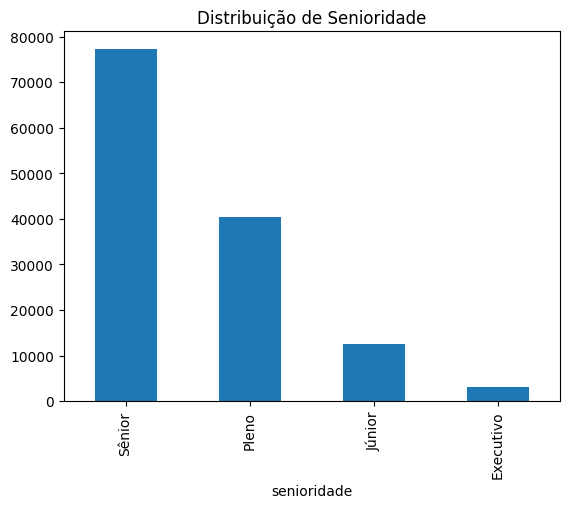

In [ ]:
df_limpo['senioridade'].value_counts().plot(kind='bar',title='Distribuição de Senioridade')
# kind - tipo de gráfico
# title - título do gráfico
# plot - código pra criar o gráfico

In [ ]:
import seaborn as sns
# nova biblioteca p/ criação de gráficos

<Axes: xlabel='senioridade', ylabel='usd'>

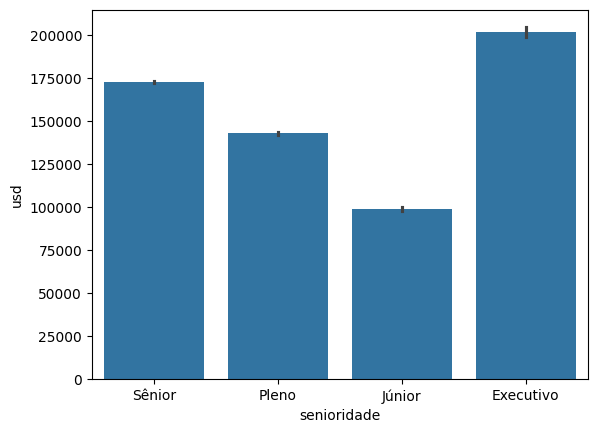

In [ ]:
sns.barplot(data = df_limpo, x = 'senioridade', y = 'usd')
# barplot - cria um gráfico de barra

In [ ]:
import matplotlib.pyplot as plt
# nova biblioteca p/ criação de gráficos

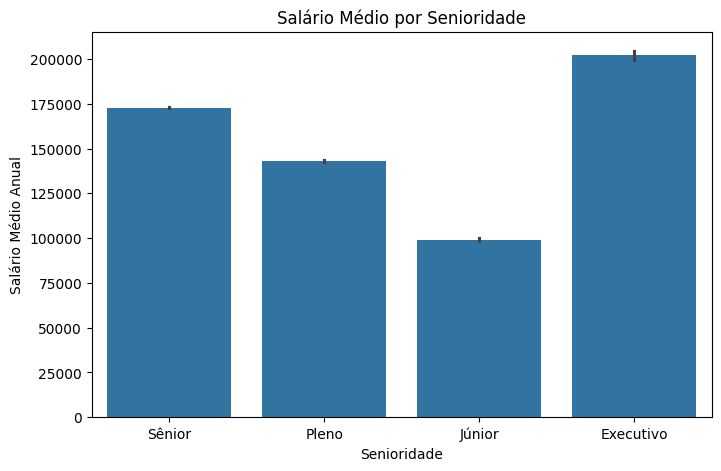

In [ ]:
plt.figure(figsize=(8,5)) # figsize - tamanho da figura
sns.barplot(data = df_limpo, x = 'senioridade', y = 'usd')
plt.title('Salário Médio por Senioridade')
plt.xlabel('Senioridade') # label - rótulo do eixo X
plt.ylabel('Salário Médio Anual')
plt.show() # show - apresenta a imagem


In [ ]:
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False)
# groupby - agrupa o df_limpo com base nos valores únicos da coluna senioridade
# mean - calcular a média
# sort_values - os resultados (médias salariais por senioridade) são ordenados de forma descendente (as.=false), do maior para o menor

,usd
senioridade,
Executivo,202027.667813
Sênior,172850.838301
Pleno,143044.845979
Júnior,99034.963267


In [ ]:
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).index
# ascending True - faz o contrário, do menor para o maior
# groupby - cria grupos p/ Sênior, Pleno, Júnior e Executivo
# index - extrai os rótulos (senioridades) da série resultante, já ordenados

In [ ]:
ordem

Index(['Executivo', 'Sênior', 'Pleno', 'Júnior'], dtype='object', name='senioridade')

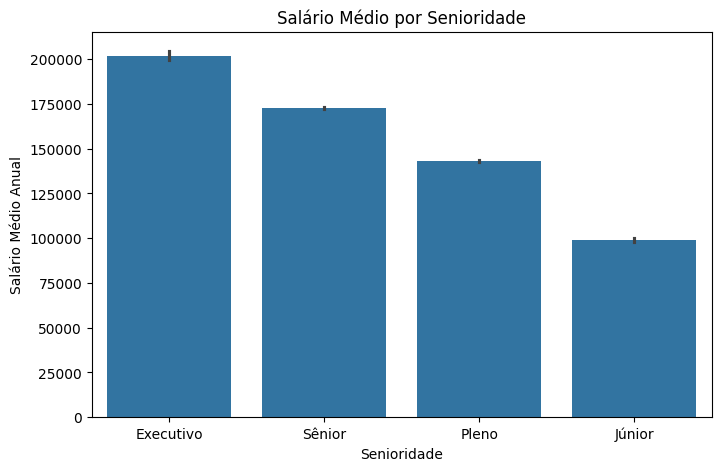

In [ ]:
plt.figure(figsize=(8,5)) # figsize - tamanho da figura
sns.barplot(data = df_limpo, x = 'senioridade', y = 'usd',order = ordem)
plt.title('Salário Médio por Senioridade')
plt.xlabel('Senioridade') # label - rótulo do eixo X
plt.ylabel('Salário Médio Anual')
plt.show() # show - apresenta a imagem

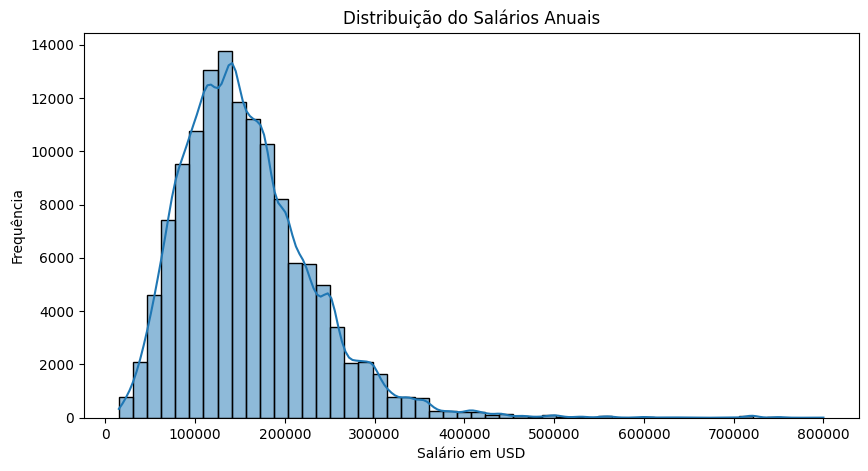

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df_limpo['usd'], bins = 50, kde = True)
# histplot - histograma
# bins - número de barras ou intervalos no histograma / False - tiramos a linha
# kde - adiciona uma Estimativa de Densidade de Kernel, uma linha q ajuda a visualizar a forma da distribuição

plt.title('Distribuição do Salários Anuais')
plt.xlabel('Salário em USD') # label - rótulo do eixo X
plt.ylabel('Frequência')
plt.show() # show - apresenta a imagem

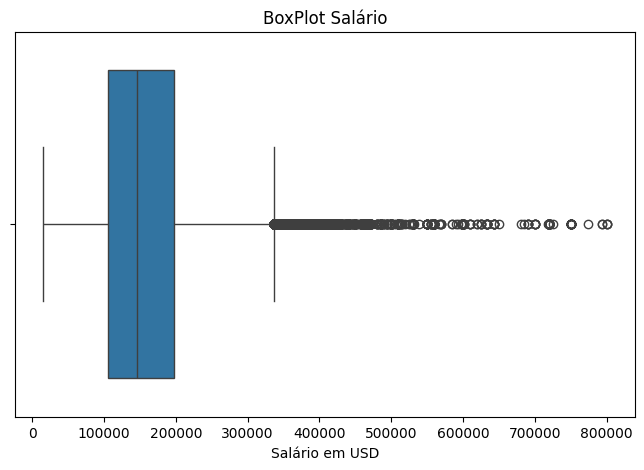

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x = df_limpo['usd'])
# boxplot - ferramenta p/ identificar a mediana, quartis e possíveis valores atípicos (outliers) na distribuição dos salários

plt.title('BoxPlot Salário')
plt.xlabel('Salário em USD') # label - rótulo do eixo X
plt.show() # show - apresenta a imagem

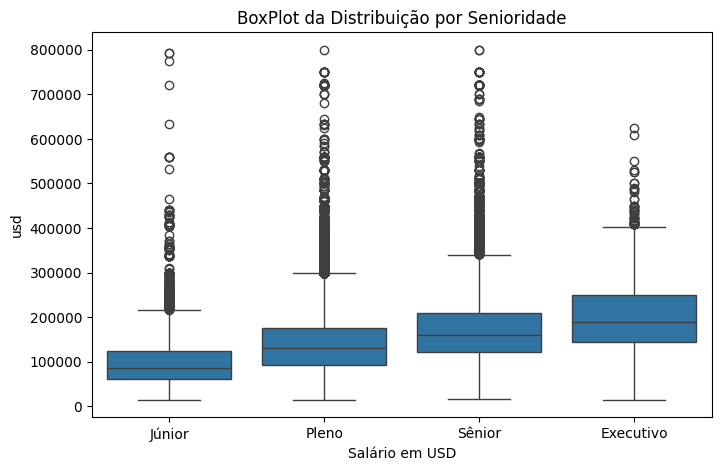

In [ ]:
ordem_senioridade = ['Júnior', 'Pleno', 'Sênior', 'Executivo']
plt.figure(figsize=(8,5))
sns.boxplot(x = 'senioridade', y = 'usd', data = df_limpo, order = ordem_senioridade)
plt.title('BoxPlot da Distribuição por Senioridade')
plt.xlabel('Salário em USD') # label - rótulo do eixo X
plt.show() # show - apresenta a imagem

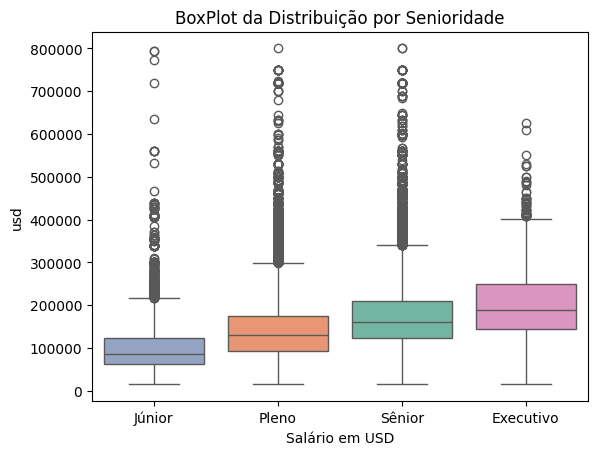

In [ ]:
sns.boxplot(x = 'senioridade', y = 'usd', data = df_limpo, order = ordem_senioridade, palette = 'Set2', hue = 'senioridade')
# palette = 'Set2' - paleta predefinida do seaborn
# hue - faz com que cada boxplot seja colorido de forma diferente com base na categoria de 'senioridade'.

plt.title('BoxPlot da Distribuição por Senioridade')
plt.xlabel('Salário em USD') # label - rótulo do eixo X
plt.show() # show - apresenta a imagem

In [ ]:
import plotly.express as px

In [ ]:
senioridade_media_salario = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(senioridade_media_salario,
             x='senioridade',
             y='usd',
             title='Média Salarial por Senioridade',
             labels={'senioridade': 'Nível de Senioridade', 'usd': 'Média Salarial Anual (USD)'})

fig.show()

In [ ]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho'
          )

fig.show()

# reset.index - A coluna que era o índice (os tipos de trabalho) se torna uma coluna regular, e as contagens se tornam outra coluna. Por padrão, as colunas seriam nomeadas 'index' e 'count'.

In [ ]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5 # buraco da rosquinha
          )
fig.show()

In [ ]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5 # buraco da rosquinha
          )
fig.update_traces(textinfo='percent+label') # coloca o nome dentro da rosquinha
fig.show()

# **Aula 4 - Criando um Dashboard Interativo**

In [ ]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Sênior,Tempo integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo integral,Data Engineer,158800,USD,158800,AU,Trabalhos presenciais,AU,Médio
3,2025.0,Pleno,Tempo integral,Data Engineer,139200,USD,139200,AU,Trabalhos presenciais,AU,Médio
4,2025.0,Júnior,Tempo integral,Data Engineer,90000,USD,90000,US,Trabalhos presenciais,US,Médio


In [ ]:
pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 67.8 MB/s eta 0:00:00


In [ ]:
import pycountry
# Função para converter ISO-2 para ISO-3
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Criar nova coluna com código ISO-3
df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)

# Calcular média salarial por país (ISO-3)
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

# Gerar o mapa
fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='usd',
                    color_continuous_scale='rdylgn',
                    title='Salário médio de Cientista de Dados por país',
                    labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})

fig.show()

In [ ]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa,residencia_iso3
0,2025,Sênior,Tempo integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio,USA
1,2025,Sênior,Tempo integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio,USA
2,2025,Pleno,Tempo integral,Data Engineer,158800,USD,158800,AU,Trabalhos presenciais,AU,Médio,AUS
3,2025,Pleno,Tempo integral,Data Engineer,139200,USD,139200,AU,Trabalhos presenciais,AU,Médio,AUS
4,2025,Júnior,Tempo integral,Data Engineer,90000,USD,90000,US,Trabalhos presenciais,US,Médio,USA


In [ ]:
df_limpo.to_csv('dados-imersao-final.csv', index=False)
# não cria um index a mais do que já existe